# Metro-Area Comparison of Neighborhoods - Main
### All location/venue data taken from the FourSquare.com API, clusters created based on The Triangle region of North Carolina, subsequently used to segement the Denver/Boulder area of Colorado in to similar neighborhoods.

#### Import relevant libraries/functions.

In [1]:
import pandas as pd
import numpy as np
import feature_processing_functions as fp
import labeling_city_functions as lf
import format_data as form
import make_map as mm
import data_and_region_setup as drs

#### Settings

In [2]:
min_venues = 10             # Minimum number of features required to keep a
                            #   region in the analysis. Default: 4

primary_city = 'triangle'   # String, 'triangle' or 'denver'. The city used to
                            #   generate the labels and to be compared against.
                            
second_city = 'denver'      # String, 'triangle' or 'denver'. The city for which
                            #   comparisons will be made to the primary city.
                        
num_clusters = 6            # The number of distinct region-types to segment
                            #   the cities in to. Default: 5

num_pca_vars = 150          # Number of features to keep when applying PCA.

search_radius = 700

region_radius = 500

#### Load Data keeping only those regions which are populated with at least 'min_features' number of features.

In [3]:
city1_data = drs.fetch_data(primary_city, min_venues, search_radius, region_radius)
city2_data = drs.fetch_data( second_city, min_venues, search_radius, region_radius)

#### Combine cities before one-hot-encode to make sure they both reflect all possible venue categories.

In [4]:
all_data = ( pd.concat( [city1_data, city2_data] )
               .reset_index(drop = True)
               )

#### Print some descriptions of the data set


There are 395 popuated regions in triangle.
There are 768 populated regions in denver.
There are 12922 unique venues between the cities.
There are 492 unique category labels between the two cities.


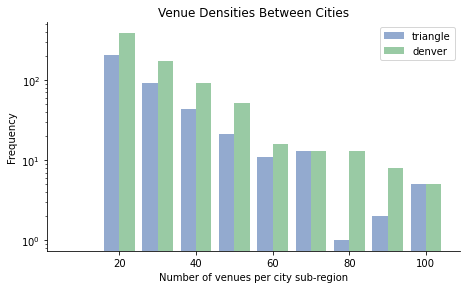

In [5]:
fp.describe(all_data, primary_city, second_city)

#### One-hot-encode

In [6]:
city1_encoded, city2_encoded = fp.encode(all_data)

#### Reduce the number of feeatures using PCA, keeping > 90% of variance

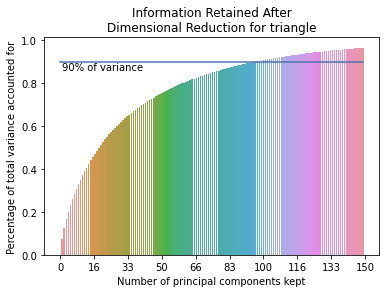

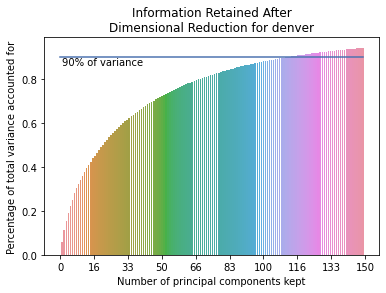

In [7]:
city1_reduced = form.apply_pca(city1_encoded, primary_city, num_pca_vars)
city2_reduced = form.apply_pca(city2_encoded, second_city,  num_pca_vars)

#### Normalize the data 

In [8]:
city1_scaled, city2_scaled = form.apply_scaling(city1_reduced, city2_reduced)

#### Segment the primary city (The Triangle), use the labels to similarly segment the secondary city (Denver)

In [9]:
city1_labeled = lf.cluster(city1_reduced, city2_reduced, num_clusters )
city2_labeled, acc, auc  = lf.label_city2(city1_labeled, city2_reduced )

print('\nAccuracy for predictions of primary city labels is {:.3f}.'.format(acc))
print('\nAUC for predictions of primary city labels is {:.3f}.'.format(auc))
#print('\nBest parameters: ', esti)
print('\nThe number of regions per label is given by:\n' )
print(lf.count_labels(city1_labeled, city2_labeled, primary_city, second_city))


Accuracy for predictions of primary city labels is 0.779.

AUC for predictions of primary city labels is 0.949.

The number of regions per label is given by:

       triangle  denver
Label                  
0            47      42
1           101     276
2            29      42
3            75     118
4           110     262
5            33      28


#### Make maps

In [10]:
city1_map = mm.make_map2(city1_labeled, primary_city, num_clusters, region_radius)
city2_map = mm.make_map2(city2_labeled, second_city, num_clusters, region_radius)

Map made! Now saving.
Map made! Now saving.


In [11]:
city1_map

In [12]:
city2_map